<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello, my name is Dmitrii. I'm going to review your project 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
    
- Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
- It is great that you can use different methods for data processing and apply them to real data and project tasks, keep it up! 
- There is only one comment to be fixed: 
  - Check missing values in the columns (e.g. cylinders/model_year).
  - Elaborate on the decision regarding missing values. 

I will wait for you to send me a new version of the project :)
    
</div>

<div class="alert alert-info"> <b>Student comments:</b> Hi, thank you for the review, it's of course much appreciated. </div>   

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for all your detailed comments and improvements in the project. Your project has been accepted. Congratulations!
    
Also, I can recommend an additional mini-course on Kaggle to test your skills: https://www.kaggle.com/learn/data-cleaning
    
Wish you cool projects in the next sprints 🍀
    

# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The overall goal of this project is to evaluate how different factors within the dataset impact the price of the car. First we will perform data preprocessing to evaluate the data we are working with. Then, exploratory data analysis will be done to compare different metrics, compare correlations, and observe plots. 

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you added additional information about project. It gives an overview of what you are going to achieve in this project.


## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Load data

In [2]:
# Load the data file into a DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Please don't forget to use head, tail or sample when showing dataframes. If you leave this table "as is", then when you save the notebook, for example, on github, the table will expand to its full length and take up a significant part of the report.

<div class="alert alert-info"> <b>Student comments:</b> Oh okay, makes sense. Thanks!</div>   

In [5]:
data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Additionally it is always helpful to calculate the percentage of missing values. It helps to understand the overall impact and to make a more weighted decision regarding what to do next. for example, like this:

    `data.isnull().sum()*100/len(data)`

Or like this:

    `report = data.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
    report.sort_values(by = 'missing_values', ascending = False)`

In [7]:
data.isnull().sum()*100/len(data)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [8]:
data.duplicated().sum()

0

'model_year', 'cylinders', 'odometer', 'paint_ color', and 'is_4wd' have missing values. 'is_4wd' by far has the most missing values, with almost half of them missing.

All the columns have appropriate data types. Although, it can be argued that floats can instead be integers in this dataset. Regardless, the data is workable. 

### Conclusions and further steps


The initial impression is that the data types look correct, but several columns are missing large amounts of data, in particular 'is_4wd'. My  impression on 'is_4wd' is that since it is a binary column (yes or no), the missing values are 0, meaning it is not a four wheel drive. This hypothesis is supported by a limited look at the values in that column, and seeing that the filled values are all "1.0" for yes. For the rest, we will evaluate whether the data can be imputed or should be removed.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

It is very helpful that you have short interim conclusions after each step. 

## Treat missing values (if any)

Dealing with 'is_4wd' first:

In [9]:
data.is_4wd.value_counts()

1.0    25572
Name: is_4wd, dtype: int64

As initially thought, all values are 1.0 for yes. We will assume here that the missing values are all 0 for no.

In [10]:
data.is_4wd = data.is_4wd.fillna(value = 0)

In [11]:
data.is_4wd.value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

**`is_4wd`**
    
Indeed, `is_4wd` contains a boolean type of information (yes/no). So filling missing data with 0 will allow us to keep a potentially useful feature. 

'is_4wd' is sorted out.

Let's look at 'model_year':

In [12]:
model_year_null = data[data['model_year'].isna()]
model_year_null

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [13]:
model_year_null['model'].value_counts()

ford f-150                           191
chevrolet silverado 1500             155
ram 1500                             117
chevrolet silverado                   98
honda accord                          80
                                    ... 
kia sorento                           14
hyundai santa fe                      13
acura tl                              12
honda civic lx                        11
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64

The missing values for model year do not seem to correlate with other columns. Since this is an important paramter, let's look at the percentage of missing data here.

In [14]:
100* len(model_year_null)/len(data)

7.023774866569626

About 7% of the data has missing model years. This will be removed from the data set

In [15]:
data = data.dropna(subset = ['model_year'])

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>

You have done great work with missing values.
However, in some cases it is beneficial to try to restore missing data, as by deleting it we can lose potentially important insights. 

**`model_year`**
  
Potentially model_year could be correlated with car moder or condition.



The 'cylinders' column:

In [16]:
data[data['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,0.0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28


In [17]:
cylinders_null = data[data['cylinders'].isna()]
cylinders_null.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,NaN,1.0,2018-10-30,3
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,0.0,2019-02-27,93
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44
135,28000,2016.0,ford mustang gt coupe 2d,good,NaN,gas,NaN,other,coupe,black,0.0,2018-11-20,28


The missing values in 'cylinders' seem to be independant of other values. However, the mode, or most common values, for each model will be aggregated and will replace the missing values. 

In [18]:
modes = data.groupby('model')['cylinders'].agg(pd.Series.mode)
modes.to_dict

<bound method Series.to_dict of model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64>

In [19]:
data['cylinders'] = data['cylinders'].fillna(data.model.map(modes))
data['cylinders'].isna().sum()

0

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>


**`cylinders`** 

Here either type or car model can be used to find more relevant value. 

Can you please check whether is makes sense to use these features and share your thoughts? 
    


<div class="alert alert-info"> <b>Student comments:</b> It seems here that the mode according to model may be a good way to fill in the values. I can see how that can help instead of removing the data. </div>   

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2</b>
    
Well done! Totally agree with your decision.
    
Also important to mention that sometimes this could distort our initial data (if there is no relationship between data features), in the last case it is better to use a placeholder or remove rows as a last option. 

The 'odometer' column:

In [20]:
odometer_null = data[data['odometer'].isna()]
odometer_null.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43
29,5495,2010.0,chevrolet impala,excellent,6.0,gas,NaN,automatic,sedan,white,0.0,2019-02-18,20
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,NaN,0.0,2019-03-08,29
41,11995,2017.0,nissan rogue,like new,4.0,gas,NaN,automatic,SUV,silver,1.0,2018-09-20,21
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
56,4200,2006.0,jeep grand cherokee,excellent,6.0,gas,NaN,automatic,SUV,white,1.0,2018-07-01,79


The missing values will be filled in with the median values in specified model year ranges. Median will be used in order to avoid influence from outliers, since the data is being imputed.

In [21]:
data.model_year.describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [22]:
(2019-1908)/5

22.2

In [23]:
def model_year_groups(year):
    if 1908 <= year < 1928.2:
        return 'age group 5'
    elif 1928.2 <= year < 1948.4:
        return 'age group 4'
    elif 1948.4 <= year < 1968.6:
        return 'age group 3'
    elif 1968.6 <= year < 1988.8:
        return 'age group 2'
    elif 1988.8 <= year <= 2019:
        return 'age group 1'

In [24]:
data['age_group'] = data['model_year'].apply(model_year_groups)
data.query('model_year <= 1968.6')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_group
63,30000,1966.0,ford mustang,excellent,6.0,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17,age group 3
1587,51000,1967.0,chevrolet corvette,excellent,8.0,gas,66000.0,manual,coupe,blue,0.0,2019-02-14,95,age group 3
2061,32900,1967.0,chevrolet camaro,good,8.0,gas,10000.0,manual,convertible,NaN,0.0,2019-01-23,33,age group 3
2834,49000,1965.0,ford mustang,excellent,8.0,gas,5160.0,manual,other,red,0.0,2019-02-27,57,age group 3
2981,5500,1968.0,ford mustang,good,6.0,gas,15000.0,automatic,coupe,custom,0.0,2018-07-14,34,age group 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44758,29900,1968.0,chevrolet camaro,like new,8.0,gas,22724.0,automatic,coupe,green,0.0,2018-10-11,37,age group 3
45362,9400,1964.0,chevrolet impala,good,8.0,gas,193000.0,automatic,sedan,custom,0.0,2019-02-14,18,age group 3
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,age group 4
47453,6500,1966.0,chevrolet impala,fair,8.0,gas,75437.0,automatic,coupe,NaN,0.0,2018-08-22,86,age group 3


In [25]:
median_odometer = data.groupby('age_group')['odometer'].median()
median_odometer.head(10)

age_group
age group 1    113092.5
age group 2     80000.0
age group 3     54661.0
age group 4     17000.0
age group 5    169328.0
Name: odometer, dtype: float64

In [26]:
median_odometer_dict=pd.Series(median_odometer).to_dict()
median_odometer_dict

{'age group 1': 113092.5,
 'age group 2': 80000.0,
 'age group 3': 54661.0,
 'age group 4': 17000.0,
 'age group 5': 169328.0}

In [27]:
data['odometer']=data['odometer'].fillna(data.age_group.map(median_odometer_dict))
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,age group 1
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,age group 1
3,1500,2003.0,ford f-150,fair,8.0,gas,113092.5,automatic,pickup,NaN,0.0,2019-03-22,9,age group 1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,age group 1
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,age group 1
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,age group 1
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,age group 1
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,age group 1
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,age group 1
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38,age group 1


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

    
**`odometer`** 

Well done with missing values in odometer! Indeed groupped values by model_year or car condition helped to fill missing values.   

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>

However, can you please elaborate why you decided to use median value and not mean/mode/etc.? 

<div class="alert alert-info"> <b>Student comments:</b> I added a qualifying statement above. I thought to use median to avoid influence from outliers, but I understand this is sort of a hot topic, and has roots in the study of statistics. Would using median here be a wise choice? </div>   

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>
    
I fully agree with your decision; however for the reader it could be helpful to have some background for this decision. 
    
You can for example plot distributions of the columns with missing data to make a decision whether to use mean or median. You can read about it here: https://medium.com/@nhan.tran/mean-median-an-mode-in-statistics-3359d3774b0b

The 'paint_color' column:

In [28]:
paint_color_null = data[data['paint_color'].isna()]
paint_color_null.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,age group 1
3,1500,2003.0,ford f-150,fair,8.0,gas,113092.5,automatic,pickup,NaN,0.0,2019-03-22,9,age group 1
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,age group 1
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,age group 1
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8,age group 1
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,113092.5,automatic,sedan,NaN,0.0,2018-07-26,43,age group 1
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,0.0,2018-09-13,25,age group 1
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,0.0,2018-06-04,121,age group 1
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,0.0,2018-05-11,37,age group 1
36,10499,2013.0,chrysler 300,good,6.0,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22,age group 1


The missing values in 'paint_color' seem to be independant of other values. We will fill these with 'unknown'

In [29]:
data['paint_color'] = data['paint_color'].fillna('unknown')
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,age group 1
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,age group 1
3,1500,2003.0,ford f-150,fair,8.0,gas,113092.5,automatic,pickup,unknown,0.0,2019-03-22,9,age group 1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,age group 1
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,age group 1
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,age group 1
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,age group 1
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,age group 1
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,age group 1
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38,age group 1


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! 

**`unknown`**   
It is correct to fill it with others, as it is not possible to fill this value based on other car features.  
    
      
</div>

## Fix data types

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47906 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         47906 non-null  object 
 3   condition     47906 non-null  object 
 4   cylinders     47906 non-null  float64
 5   fuel          47906 non-null  object 
 6   odometer      47906 non-null  float64
 7   transmission  47906 non-null  object 
 8   type          47906 non-null  object 
 9   paint_color   47906 non-null  object 
 10  is_4wd        47906 non-null  float64
 11  date_posted   47906 non-null  object 
 12  days_listed   47906 non-null  int64  
 13  age_group     47906 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>


Great that you checked data types. One minor remark here is that you you can change is_4wd to bool type as it contains (0/1).

## Enrich data

In [31]:
# Add datetime values for when the ad was placed
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  float64       
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  float64       
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  float64       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
 13  age_group     47906 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 5.5+ MB


In [32]:
# Add the vehicle's age when the ad was placed
data['age'] = data['date_posted'].dt.year - data['model_year']
data['age']

0         7.0
2         6.0
3        16.0
4         2.0
5         4.0
         ... 
51520     5.0
51521    16.0
51522     9.0
51523     5.0
51524     4.0
Name: age, Length: 47906, dtype: float64

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Here as a second approach you can also add  +1 to the equation above to take into account the current year. Otherwise, it will lead to multiple 0 in `vehicle_age`.
    


In [33]:
# Add the vehicle's average mileage per year
# note: this takes a little time
for value in data['age']:
    if value != 0:
        data['mileage_peryear'] = data['odometer']/value
    else:
        data['mileage_peryear'] = data['odometer']

In [34]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_group,age,mileage_peryear
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,age group 1,7.0,36250.000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,age group 1,6.0,27500.000
3,1500,2003.0,ford f-150,fair,8.0,gas,113092.5,automatic,pickup,unknown,0.0,2019-03-22,9,age group 1,16.0,28273.125
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,age group 1,2.0,20225.750
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,age group 1,4.0,14488.500
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,age group 1,3.0,19803.000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,age group 1,6.0,27368.250
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,age group 1,6.0,26043.500
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,age group 1,11.0,36797.750
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38,age group 1,7.0,32103.250


In [35]:
# It might help to replace the condition values with something that can be manipulated more easily

def numerical_cond(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    elif condition == 'salvage':
        return 0

In [36]:
data['numerical_cond'] = data['condition'].apply(numerical_cond)
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_group,age,mileage_peryear,numerical_cond
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,age group 1,7.0,36250.000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,age group 1,6.0,27500.000,4
3,1500,2003.0,ford f-150,fair,8.0,gas,113092.5,automatic,pickup,unknown,0.0,2019-03-22,9,age group 1,16.0,28273.125,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,age group 1,2.0,20225.750,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,age group 1,4.0,14488.500,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,age group 1,3.0,19803.000,3
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,age group 1,6.0,27368.250,3
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,age group 1,6.0,26043.500,3
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,age group 1,11.0,36797.750,3
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38,age group 1,7.0,32103.250,3


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>


Great, now data is ready for the analysis. 

## Check clean data

In [37]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            47906 non-null  int64         
 1   model_year       47906 non-null  float64       
 2   model            47906 non-null  object        
 3   condition        47906 non-null  object        
 4   cylinders        47906 non-null  float64       
 5   fuel             47906 non-null  object        
 6   odometer         47906 non-null  float64       
 7   transmission     47906 non-null  object        
 8   type             47906 non-null  object        
 9   paint_color      47906 non-null  object        
 10  is_4wd           47906 non-null  float64       
 11  date_posted      47906 non-null  datetime64[ns]
 12  days_listed      47906 non-null  int64         
 13  age_group        47906 non-null  object        
 14  age              47906 non-null  float

In [38]:
# print a sample of data

data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_group,age,mileage_peryear,numerical_cond
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,age group 1,7.0,36250.000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,age group 1,6.0,27500.000,4
3,1500,2003.0,ford f-150,fair,8.0,gas,113092.5,automatic,pickup,unknown,0.0,2019-03-22,9,age group 1,16.0,28273.125,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,age group 1,2.0,20225.750,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,age group 1,4.0,14488.500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,age group 1,5.0,22034.000,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,age group 1,16.0,45375.000,0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,age group 1,9.0,32000.000,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,age group 1,5.0,34893.250,2


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [39]:
def distribution_plots(parameter):
    print('The histogram and boxplots of: {}'.format(parameter))

    data[parameter].hist()
    plt.show()
    data.boxplot(column = parameter)
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    # Percentile Technique
    print('---------------------------------------')
    print('Percentile Technique:')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    ninety_five = np.percentile(data[parameter], 95).round()
    five = np.percentile(data[parameter], 5).round()
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below', five, "and above",ninety_five)
    print('We have',len(data[(data[parameter]<five)|(data[parameter]>ninety_five)]),"values that we can consider outliers")
    # IQR Technique
    print('\nIQR Technique:')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('We have',len(data[data[parameter]>max_iqr]),"values that we can consider outliers")
    else:
        print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
        print('We have',len(data[(data[parameter]<min_iqr)|(data[parameter]>max_iqr)]),"values that we can consider outliers")

The histogram and boxplots of: price


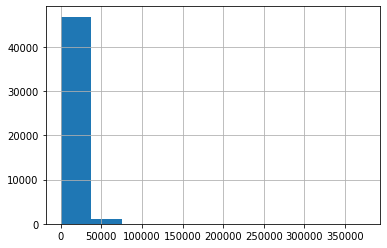

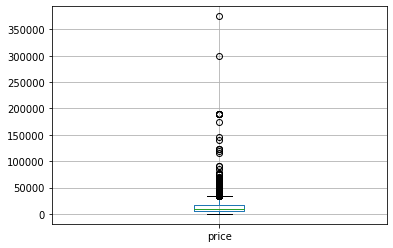

The distribution is skewed to the right
---------------------------------------
Percentile Technique:
---------------------------------------
Statistics on: price
count     47906.000000
mean      12160.465203
std       10082.453773
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 1950.0
max border: 30495.0
---------------------------------------
The outliers are considered to be values below 1950.0 and above 30495.0
We have 4771 values that we can consider outliers

IQR Technique:
---------------------------------------
Statistics on: price
count     47906.000000
mean      12160.465203
std       10082.453773
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: -12850.0
max border: 34750.0
--------------

In [40]:
# price

distribution_plots('price')

The histogram and boxplots of: age


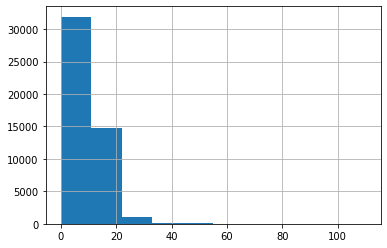

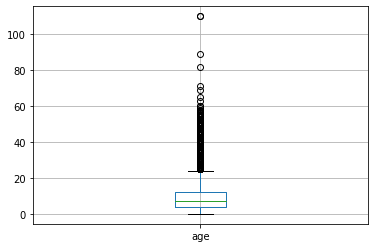

The distribution is skewed to the right
---------------------------------------
Percentile Technique:
---------------------------------------
Statistics on: age
count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64
---------------------------------------
min border: 1.0
max border: 19.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 19.0
We have 4198 values that we can consider outliers

IQR Technique:
---------------------------------------
Statistics on: age
count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64
---------------------------------------
min border: -8.0
max border: 24.0
---------------------------------------
The outliers are 

In [41]:
# age
distribution_plots('age')


The histogram and boxplots of: mileage_peryear


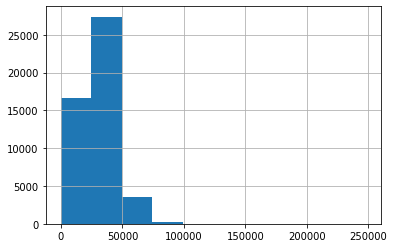

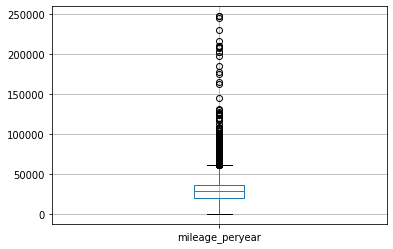

The distribution is skewed to the right
---------------------------------------
Percentile Technique:
---------------------------------------
Statistics on: mileage_peryear
count     47906.000000
mean      28757.701856
std       15008.882908
min           0.000000
25%       19750.000000
50%       28273.125000
75%       36582.500000
max      247500.000000
Name: mileage_peryear, dtype: float64
---------------------------------------
min border: 4750.0
max border: 54141.0
---------------------------------------
The outliers are considered to be values below 4750.0 and above 54141.0
We have 4786 values that we can consider outliers

IQR Technique:
---------------------------------------
Statistics on: mileage_peryear
count     47906.000000
mean      28757.701856
std       15008.882908
min           0.000000
25%       19750.000000
50%       28273.125000
75%       36582.500000
max      247500.000000
Name: mileage_peryear, dtype: float64
---------------------------------------
min border: -54

In [42]:
# mileage
distribution_plots('mileage_peryear')


The histogram and boxplots of: cylinders


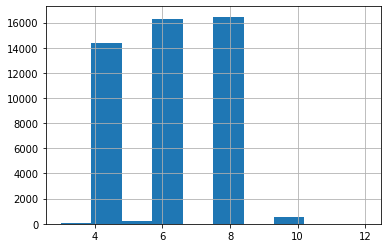

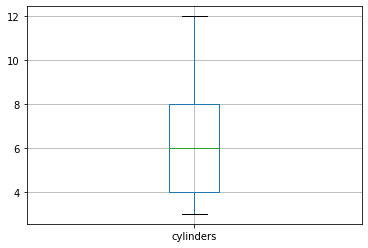

The distribution is skewed to the right
---------------------------------------
Percentile Technique:
---------------------------------------
Statistics on: cylinders
count    47906.000000
mean         6.123012
std          1.657062
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 552 values that we can consider outliers

IQR Technique:
---------------------------------------
Statistics on: cylinders
count    47906.000000
mean         6.123012
std          1.657062
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: -2.0
max border: 14.0
------------------------------------

In [43]:
# cylinders

distribution_plots('cylinders')

The histogram and boxplots of: numerical_cond


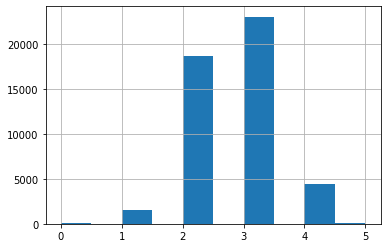

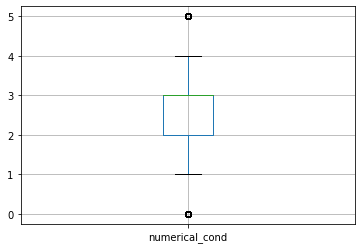

The distribution is skewed to the left
---------------------------------------
Percentile Technique:
---------------------------------------
Statistics on: numerical_cond
count    47906.000000
mean         2.638605
std          0.711839
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: numerical_cond, dtype: float64
---------------------------------------
min border: 2.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 2.0 and above 4.0
We have 1728 values that we can consider outliers

IQR Technique:
---------------------------------------
Statistics on: numerical_cond
count    47906.000000
mean         2.638605
std          0.711839
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: numerical_cond, dtype: float64
---------------------------------------
min border: 0.5
max border: 4.5
------------------

In [44]:
# condition

distribution_plots('numerical_cond')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>


I really like such a detailed data evaluation, especially with the help of a function. 

## Study and treat outliers


All data will be analyzed without outliers. The percentile technique will be used, as this seems to be specifiy more appropriate outliers

In [45]:
# Determine the limits for outliers
# price, age, mileage_peryear, and condition all have outliers
def distribution_percentile(parameter):
    ninety_five = np.percentile(data[parameter], 95).round()
    five = np.percentile(data[parameter], 5).round()
    print('For the parameter:', parameter)
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(data[(data[parameter]<five)|(data[parameter]>ninety_five)]),"values that we can consider outliers\n")

In [46]:
parameters = ['price', 'age', 'mileage_peryear', 'cylinders', 'numerical_cond']

In [47]:
for parameter in parameters:
    distribution_percentile(parameter)

For the parameter: price
The outliers are considered to be values below 1950.0 and above 30495.0
We have 4771 values that we can consider outliers

For the parameter: age
The outliers are considered to be values below 1.0 and above 19.0
We have 4198 values that we can consider outliers

For the parameter: mileage_peryear
The outliers are considered to be values below 4750.0 and above 54141.0
We have 4786 values that we can consider outliers

For the parameter: cylinders
The outliers are considered to be values below 4.0 and above 8.0
We have 552 values that we can consider outliers

For the parameter: numerical_cond
The outliers are considered to be values below 2.0 and above 4.0
We have 1728 values that we can consider outliers



In [48]:
# Store data without outliers in a separate DataFrame
subset1=data[(data['price']>1977)&(data['price']<30486)]
subset2=data[(data['age']>1)&(data['age']<19)]
subset3=data[(data['mileage_peryear']>4713)&(data['mileage_peryear']<54055)]
subset4=data[(data['cylinders']>=4) & (data['cylinders']<=8)]
subset5=data[(data['numerical_cond']>=2)&(data['numerical_cond']<=4)]
subsets = [subset1,subset2,subset3,subset4,subset5]


## Study core parameters without outliers

In [49]:
def distribution_plots_subsets(parameters):
    i=0
    for parameter in parameters:
        print('\nHistogram and boxplots for: {}'.format(parameter))
        subsets[i][parameter].hist()
        plt.show()
        subsets[i].boxplot(column = parameter)
        plt.show()
        if subsets[i][parameter].mean()>subsets[i][parameter].median():
            print('The distribution is skewed to the right')
        else:
            print('The distribution is skewed to the left')
        print('---------------------------------------')
        print('Statistics on: {}'.format(parameter))
        print(subsets[i][parameter].describe())
        
        i += 1


Histogram and boxplots for: price


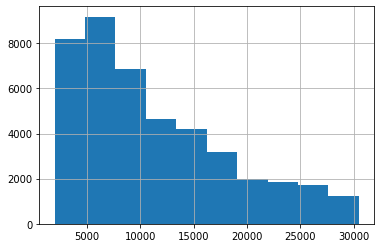

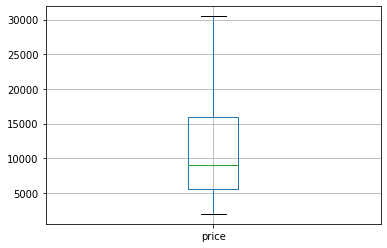

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count    43094.000000
mean     11263.300065
std       7109.125914
min       1980.000000
25%       5500.000000
50%       9000.000000
75%      15900.000000
max      30470.000000
Name: price, dtype: float64

Histogram and boxplots for: age


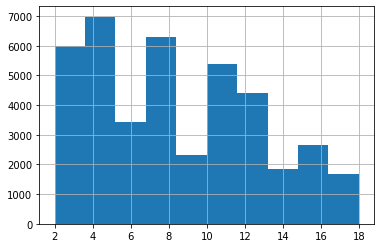

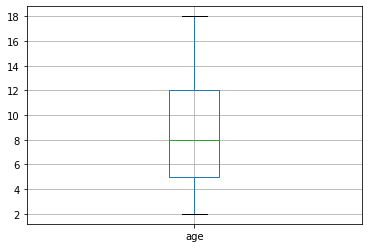

The distribution is skewed to the right
---------------------------------------
Statistics on: age
count    41013.000000
mean         8.353303
std          4.330385
min          2.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         18.000000
Name: age, dtype: float64

Histogram and boxplots for: mileage_peryear


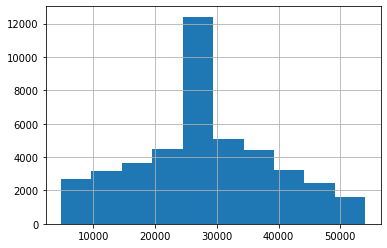

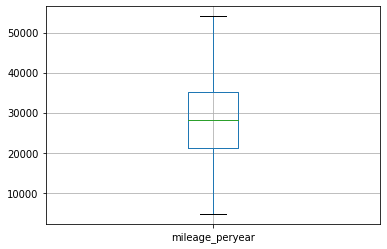

The distribution is skewed to the left
---------------------------------------
Statistics on: mileage_peryear
count    43119.000000
mean     28222.313762
std      11093.568043
min       4725.000000
25%      21157.750000
50%      28273.125000
75%      35250.000000
max      54047.500000
Name: mileage_peryear, dtype: float64

Histogram and boxplots for: cylinders


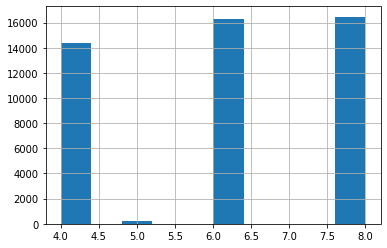

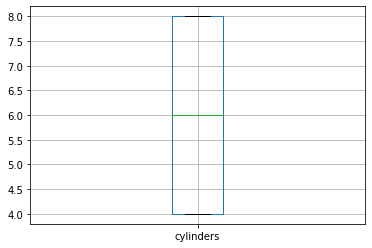

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    47354.000000
mean         6.082612
std          1.613650
min          4.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: cylinders, dtype: float64

Histogram and boxplots for: numerical_cond


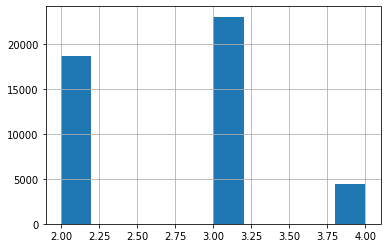

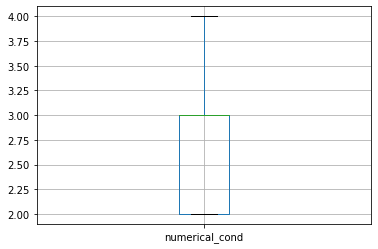

The distribution is skewed to the left
---------------------------------------
Statistics on: numerical_cond
count    46178.000000
mean         2.690632
std          0.636101
min          2.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: numerical_cond, dtype: float64


In [50]:
distribution_plots_subsets(parameters)

The plots with the subsets of data excluding outliers is much more readable. In particular, the datasets of price, age, and mileage_peryear are much more legibile when excluding outliers.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! You perfectly identified and handled outliers. You can additionally check a nice article about working with outliers:
- https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
</div>

## Ads lifetime


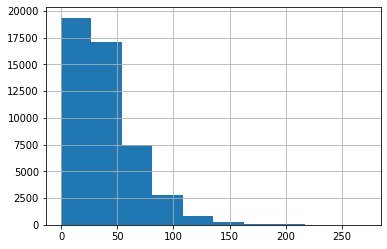

In [51]:
data['days_listed'].hist();

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
   
    
Also adding titles to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.

In [52]:
data['days_listed'].median()

33.0

In [53]:
data['days_listed'].mean()

39.56483530246733

In [54]:
ninety_five = np.percentile(data['days_listed'], 95).round()
five = np.percentile(data['days_listed'], 5).round()
print('The outliers are considered to be values below', five, "and above",ninety_five)
print('We have',len(data[(data['days_listed']<five)|(data['days_listed']>ninety_five)]),"values that we can consider outliers")

The outliers are considered to be values below 7.0 and above 94.0
We have 4585 values that we can consider outliers


In [55]:
days_short = data.query('days_listed < @five')
days_short['condition'].value_counts()

excellent    1093
good          849
like new      232
fair           68
new             8
salvage         2
Name: condition, dtype: int64

In [56]:
days_long = data.query('days_listed > @ninety_five')
days_long['condition'].value_counts()

excellent    1142
good          904
like new      212
fair           66
salvage         5
new             4
Name: condition, dtype: int64

In [57]:
days_long.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,mileage_peryear,numerical_cond
price,1.000000,0.356010,0.286762,-0.407432,0.292658,-0.035751,-0.354101,-0.407432,0.196669
model_year,0.356010,1.000000,-0.180284,-0.370616,0.059976,0.003769,-0.997465,-0.370616,0.209425
cylinders,0.286762,-0.180284,1.000000,0.079690,0.389359,-0.000296,0.180492,0.079690,-0.072205
odometer,-0.407432,-0.370616,0.079690,1.000000,0.009725,0.018598,0.368423,1.000000,-0.275349
is_4wd,0.292658,0.059976,0.389359,0.009725,1.000000,-0.018578,-0.060525,0.009725,0.025861
days_listed,-0.035751,0.003769,-0.000296,0.018598,-0.018578,1.000000,-0.000958,0.018598,-0.007803
age,-0.354101,-0.997465,0.180492,0.368423,-0.060525,-0.000958,1.000000,0.368423,-0.209504
mileage_peryear,-0.407432,-0.370616,0.079690,1.000000,0.009725,0.018598,0.368423,1.000000,-0.275349
numerical_cond,0.196669,0.209425,-0.072205,-0.275349,0.025861,-0.007803,-0.209504,-0.275349,1.000000


In [58]:
days_short.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,mileage_peryear,numerical_cond
price,1.000000,0.437612,0.313044,-0.395857,0.344560,-0.033800,-0.436646,-0.395857,0.265042
model_year,0.437612,1.000000,-0.147969,-0.382924,0.047632,-0.022478,-0.997387,-0.382924,0.278496
cylinders,0.313044,-0.147969,1.000000,0.067981,0.445272,0.012932,0.145788,0.067981,-0.096966
odometer,-0.395857,-0.382924,0.067981,1.000000,0.003702,0.011796,0.383272,1.000000,-0.272766
is_4wd,0.344560,0.047632,0.445272,0.003702,1.000000,-0.053699,-0.047455,0.003702,0.030059
days_listed,-0.033800,-0.022478,0.012932,0.011796,-0.053699,1.000000,0.021880,0.011796,-0.020368
age,-0.436646,-0.997387,0.145788,0.383272,-0.047455,0.021880,1.000000,0.383272,-0.276086
mileage_peryear,-0.395857,-0.382924,0.067981,1.000000,0.003702,0.011796,0.383272,1.000000,-0.272766
numerical_cond,0.265042,0.278496,-0.096966,-0.272766,0.030059,-0.020368,-0.276086,-0.272766,1.000000


The typical lifetime of an ad based on the median value is 33 days, whereas it is about 40 days based on the mean. The outliers according to the percentile technique is any ad below 7 days, or any ad above 94 days. After applying filtering conditions with the outlier boundaries, it was not apparent that any other factor determines a short or long advertisement period.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Typical lifetime of an ad has been correctly identified.

## Average price per each type of vehicle

In [59]:
vehicle_type_data= data.groupby(['type'])['price'].agg(['count','mean']).reset_index()
vehicle_type_data

,type,count,mean
0,SUV,11486,11162.924256
1,bus,24,17135.666667
2,convertible,419,14448.930788
3,coupe,2158,14340.695551
4,hatchback,974,6892.285421
5,mini-van,1075,8145.328372
6,offroad,204,14227.946078
7,other,234,10873.666667
8,pickup,6484,16169.763880
9,sedan,11306,6995.972758


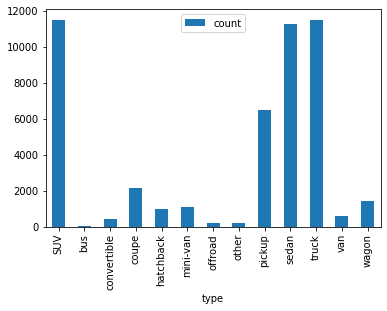

In [60]:
vehicle_type_data.plot(x = 'type', y = 'count', kind = 'bar');

In [61]:
vehicle_type_data.sort_values(by = 'count', ascending = False)

,type,count,mean
10,truck,11517,16753.880090
0,SUV,11486,11162.924256
9,sedan,11306,6995.972758
8,pickup,6484,16169.763880
3,coupe,2158,14340.695551
12,wagon,1431,9089.562544
5,mini-van,1075,8145.328372
4,hatchback,974,6892.285421
11,van,594,10286.612795
2,convertible,419,14448.930788


The two vehicle types that have the most ads are SUVs and trucks, respectively.

## Price factors

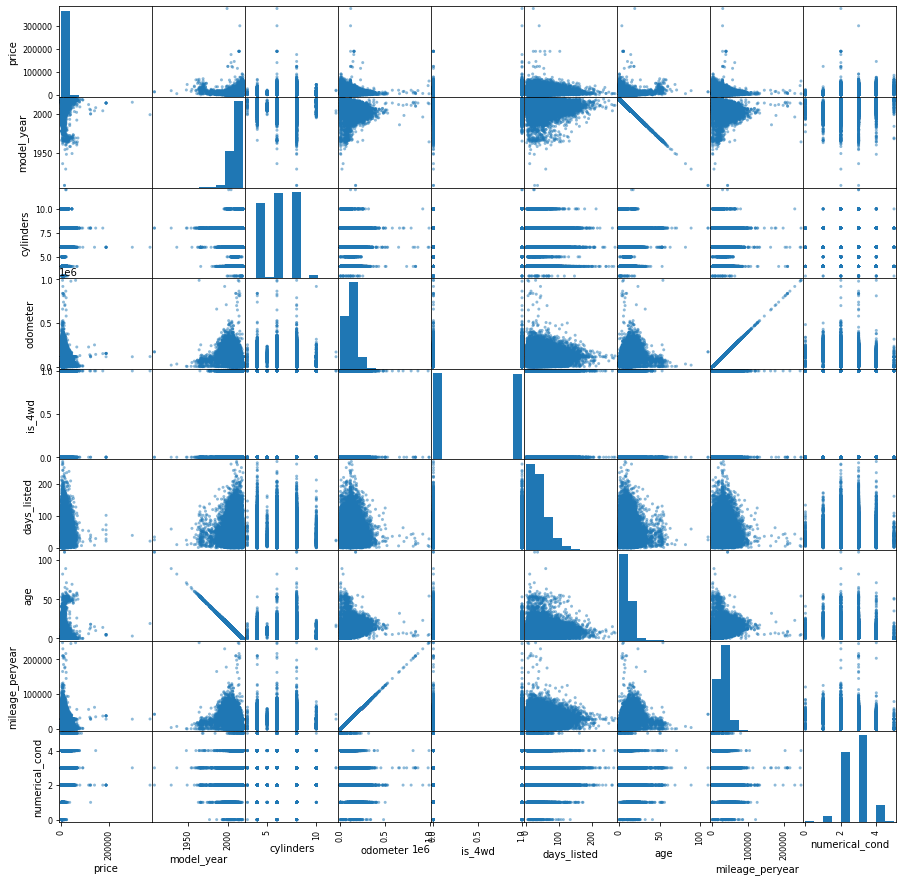

In [62]:
pd.plotting.scatter_matrix(data, figsize = (15,15))
plt.show()

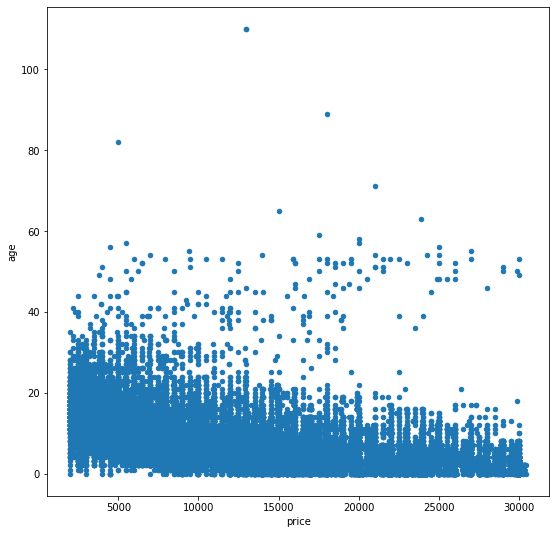

In [63]:
subset1.plot(x = 'price', y = 'age', kind = 'scatter', figsize = (9,9));

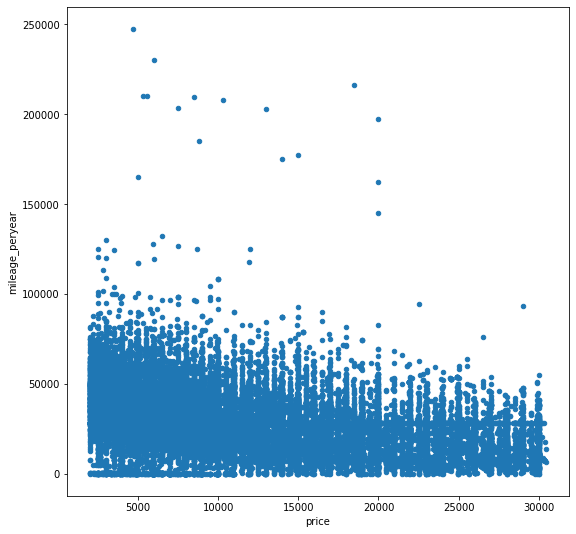

In [64]:
subset1.plot(x = 'price', y = 'mileage_peryear', kind = 'scatter', figsize = (9,9));

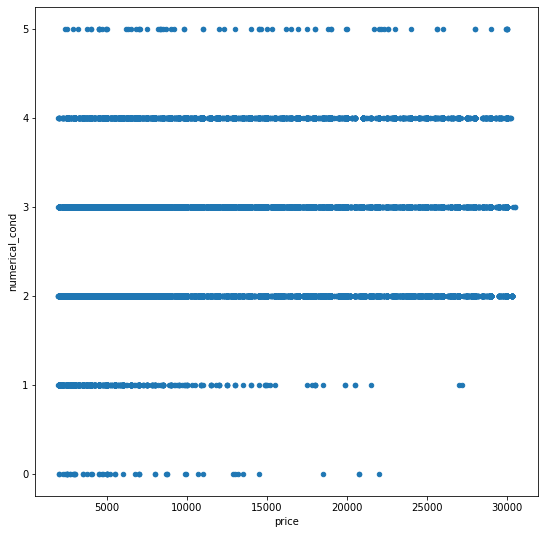

In [65]:
subset1.plot(x = 'price', y = 'numerical_cond', kind = 'scatter', figsize = (9,9));

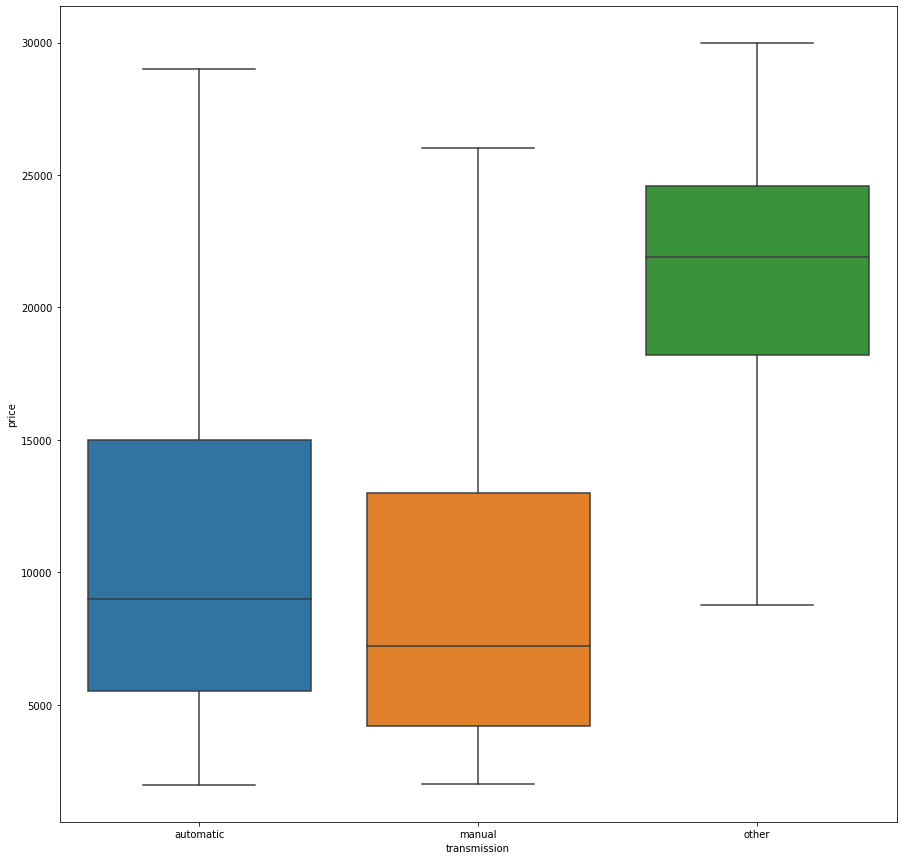

In [66]:
plt.figure(figsize=(15,15))
sns.boxplot(x="transmission", y="price", data=subset1, showfliers = False);

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
In order not to show auxiliary python outputs like "matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90 ', you can add a semicolon or plt.show () at the end of the line.
 

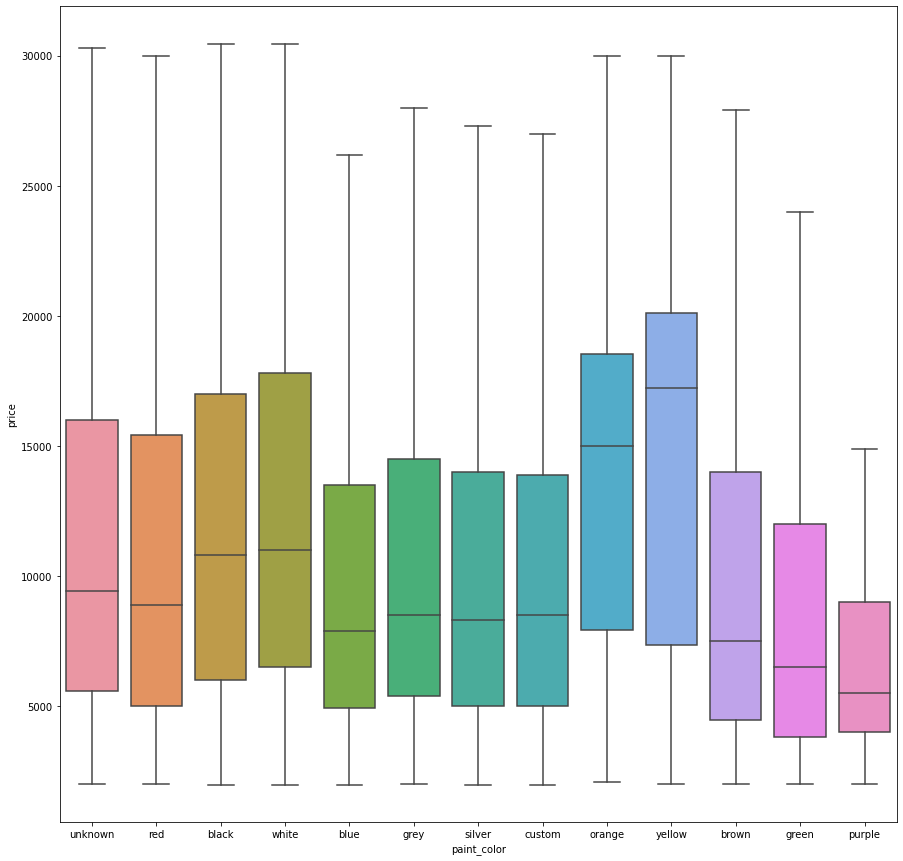

In [67]:
plt.figure(figsize=(15,15))
sns.boxplot(x="paint_color", y="price", data=subset1, showfliers = False);

In [68]:
data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,mileage_peryear,numerical_cond
price,1.000000,0.428656,0.299025,-0.384326,0.316981,-0.002436,-0.427448,-0.384326,0.220104
model_year,0.428656,1.000000,-0.147091,-0.432172,0.043384,-0.005703,-0.997310,-0.432172,0.282421
cylinders,0.299025,-0.147091,1.000000,0.082383,0.406797,0.000208,0.146741,0.082383,-0.066510
odometer,-0.384326,-0.432172,0.082383,1.000000,0.032416,0.003841,0.430718,1.000000,-0.273634
is_4wd,0.316981,0.043384,0.406797,0.032416,1.000000,0.001971,-0.043431,0.032416,0.015671
days_listed,-0.002436,-0.005703,0.000208,0.003841,0.001971,1.000000,0.006422,0.003841,-0.003026
age,-0.427448,-0.997310,0.146741,0.430718,-0.043431,0.006422,1.000000,0.430718,-0.281486
mileage_peryear,-0.384326,-0.432172,0.082383,1.000000,0.032416,0.003841,0.430718,1.000000,-0.273634
numerical_cond,0.220104,0.282421,-0.066510,-0.273634,0.015671,-0.003026,-0.281486,-0.273634,1.000000


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall an excellent data analysis with correct conclusions and different graph types.
Great that you managed to check correlation of different features. Additionally a heatmap could be created based on this data.

</div>

## General conclusion


Initially, the data was received with some artifacts that were changed. 'is_4wd' consisted of roughly 50% missing values. It was determined that the missing values were of value 0 indicating no 4wd, as the values that were present were all 1, indicating that 4wd is present. There were about 7% model years missing, and this data was removed from the dataset since identifying model years based on other factors was not possible. For the missing cylinder values, these were replaced with the most common cylinder count (mode) per model. The odometer reading was filled in with median values based on ranges of model years. Median values were used in this case in order to avoid outlier influence. The missing values of paint_color was filled in with 'unknown'.

After cleaning up the data, exploratory data analysis was performed. At this stage, the outliers for each dataset was determined, and corresponding plots showing a readable distribution were created. As the final analysis aims to determine what factors affect price the most, the outliers for price were removed from the dataset. Age, mileage, condition, transmission type, and paint color were all the factors that were evaluated.

The price seems not to be very dependent on the age and condition parameters. Within mileage, we can see a slight correlation that agrees with intuition, such as lower mileages demand higher prices. When analyzing the boxplots of tranmission types, it is apparent that the "other" transmission type demands a much higher price than the other two of "automatic" or "manual". Finally, the paint colors of yellow and orange seem to sell for the higher prices.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions (but did not get the last sentence though). It is very structured and provides insights about what you accomplished and recommendations to the business.

<div class="alert alert-info"> <b>Student comments:</b> Thanks, I've updated the conlusion to reflect the changes as well.</div>   

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Thank you for great improvements and I hope that smth was useful 😇